In [11]:
# this notebook will be used to create a cnn for state indentification for a double dot data set with 3 dimensions.
# CNN for learning!

# learn the states of a double dot
import numpy as np
import tensorflow as tf
import glob
import os

from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib

tf.logging.set_verbosity(tf.logging.INFO)

# application logic will be added here
def cnn_model_fn(features,labels,mode):
    '''Model function for CNN'''
    #input layer
    input_layer = tf.cast(tf.reshape(features,[-1,50,50,50]),tf.float32)
    
    conv1 = tf.layers.conv2d(inputs=input_layer,
                            filters=32,
                            kernel_size=5,
                            padding="same",
                            activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=2,strides=2)
    
    conv2 = tf.layers.conv2d(inputs=pool1,
                            filters=64,
                            kernel_size=5,
                            padding="same",
                            activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=2,strides=2)
    
    flat = tf.contrib.layers.flatten(inputs=pool2)
    # dense output layer
    out1 = tf.layers.dense(inputs=flat,units=1024,activation=tf.nn.relu)  
    dropout1 = tf.layers.dropout(
      inputs=out1, rate=0.4, training=mode == learn.ModeKeys.TRAIN)
    
    out = tf.layers.dense(inputs=dropout1, units=125000)
    
    loss = None
    train_op = None

    # Calculate loss( for both TRAIN AND EVAL modes)
    if mode != learn.ModeKeys.INFER:
        loss = tf.losses.mean_squared_error(out,labels)

    # Configure the training op (for TRAIN mode)
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(
            loss=loss,
            global_step=tf.contrib.framework.get_global_step(),
            learning_rate=1e-3,
            optimizer=tf.train.AdamOptimizer)

    # Generate predictions
    predictions= {
        "states" : tf.rint(out),
    }
    
    # Returna  ModelFnOps object
    return model_fn_lib.ModelFnOps(mode=mode,predictions=predictions,loss=loss, train_op=train_op)
    
    
def get_train_inputs():
    x = tf.constant(train_data,dtype=tf.float32)
    y = tf.constant(train_labels,dtype=tf.float32)
    return x,y

def get_test_inputs():
    x = tf.constant(test_data,dtype=tf.float32)
    y = tf.constant(test_labels,dtype=tf.float32)
    return x,y


# create the estimator
dd_classifier = learn.Estimator(model_fn=cnn_model_fn,model_dir = "/Users/ssk4/tensorflow_models/dd3d/")

# set up logging for predictions
tensors_to_log = {}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=100)

metrics = {
    "accuracy" : learn.MetricSpec(metric_fn=tf.metrics.accuracy, prediction_key="states"),
}
for _ in range(1):
    dd_classifier.fit(
        input_fn=get_train_inputs,
        steps=100,
        monitors=[logging_hook])
    
    eval_results=dd_classifier.evaluate(input_fn=get_train_inputs,metrics=metrics,steps=1)
    print("Train accuracy",eval_results)
    eval_results=dd_classifier.evaluate(input_fn=get_test_inputs,metrics=metrics,steps=1)
    print("Validation accuracy",eval_results)

print("Total number of samples :",n_samples)
print("Training samples :",n_train)
print("Test samples :",n_samples - n_train)
eval_results=dd_classifier.evaluate(input_fn=get_test_inputs,metrics=metrics,steps=1)
print("Test accuracy",eval_results)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1585db650>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /Users/ssk4/tensorflow_models/dd3d/model.ckpt-100
INFO:tensorflow:Saving checkpoints for 101 into /Users/ssk4/tensorflow_models/dd3d/model.ckpt.
INFO:tensorflow:loss = 0.155674, step = 101
INFO:tensorflow:
INFO:tensorflow:Saving checkpoints for 200 into /Users/ssk4/tensorflow_models/dd3d/model.ckpt.
INFO:ten

In [8]:
# learn the states of a double dot
import numpy as np
import tensorflow as tf
import glob
import os

from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib

tf.logging.set_verbosity(tf.logging.INFO)

# application logic will be added here
def cnn_model_fn(features,labels,mode):
    '''Model function for CNN'''
    #input layer
    input_layer = tf.cast(tf.reshape(features,[-1,50,50,50]),tf.float32)
    
    conv1 = tf.layers.conv2d(inputs=input_layer,
                            filters=32,
                            kernel_size=5,
                            padding="same",
                            activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=2,strides=2)
    
    conv2 = tf.layers.conv2d(inputs=pool1,
                            filters=64,
                            kernel_size=5,
                            padding="same",
                            activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=2,strides=2)
    
    flat = tf.contrib.layers.flatten(inputs=pool2)
    # dense output layer
    out1 = tf.layers.dense(inputs=flat,units=1024,activation=tf.nn.relu)  
    dropout1 = tf.layers.dropout(
      inputs=out1, rate=0.4, training=mode == learn.ModeKeys.TRAIN)
    
    out = tf.layers.dense(inputs=dropout1, units=125000)
    
    loss = None
    train_op = None

    # Calculate loss( for both TRAIN AND EVAL modes)
    if mode != learn.ModeKeys.INFER:
        loss = tf.losses.mean_squared_error(out,labels)

    # Configure the training op (for TRAIN mode)
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(
            loss=loss,
            global_step=tf.contrib.framework.get_global_step(),
            learning_rate=1e-3,
            optimizer=tf.train.AdamOptimizer)

    # Generate predictions
    predictions= {
        "states" : tf.rint(out),
    }
    
    # Returna  ModelFnOps object
    return model_fn_lib.ModelFnOps(mode=mode,predictions=predictions,loss=loss, train_op=train_op)
    
    
def get_train_inputs():
    x = tf.constant(train_data,dtype=tf.float32)
    y = tf.constant(train_labels,dtype=tf.float32)
    return x,y

def get_test_inputs():
    x = tf.constant(test_data,dtype=tf.float32)
    y = tf.constant(test_labels,dtype=tf.float32)
    return x,y

dd_classifier = learn.Estimator(model_fn=cnn_model_fn,model_dir = "/Users/ssk4/tensorflow_models/dd3d/")
pred = dd_classifier.predict(input_fn=get_test_inputs,as_iterable=False)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x141b62450>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /Users/ssk4/tensorflow_models/dd3d/model.ckpt-200

In [12]:
state_map_pred = pred['states'].reshape((50,50,50))

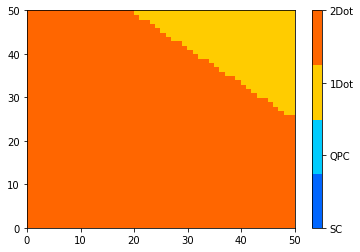

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
my_cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])
plt.pcolor(state_map_pred[49],vmin=-1,vmax=2,cmap=my_cmap)

cbar = plt.colorbar(cmap=my_cmap,ticks=[-1,0,1,2])
cbar.set_ticks([-1.0,0,1,2])
cbar.set_ticklabels(["SC","QPC","1Dot","2Dot"])


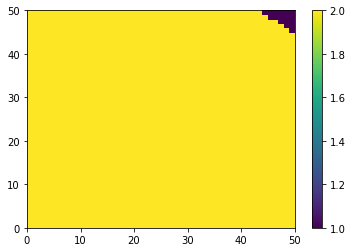

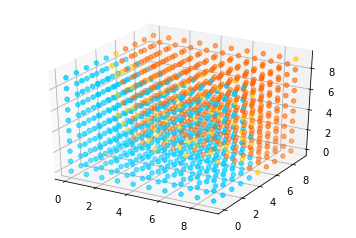

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n_dim = 10
x = np.arange(n_dim)
xx,yy,zz = np.meshgrid(x,x,x)
my_cmap = mpl.colors.ListedColormap([[0., .4, 1.], [0., .8, 1.],
                                  [1., .8, 0.], [1., .4, 0.]])

norm = mpl.colors.Normalize(vmin=-1, vmax=2)
m = cm.ScalarMappable(norm=norm, cmap=my_cmap)
n_step = int(125000/(n_dim**3))
c=m.to_rgba(pred['states'][0][::n_step])
ax.scatter(xx,yy,zz,c=c)

In [7]:
# get the data
data_folder_path = "/Users/ssk4/dd3d_data/"
files = glob.glob(data_folder_path + "*.npy")
inp = []
oup = []
for file in files:
    dat = np.load(file).item()
    curr_map = np.array([x['current'] for x in dat['output']])
    def convert_to_state(dat_ele_output):
        state = dat_ele_output['state']
        if state == "QPC":
            return 0
        elif state == "ShortCircuit":
            return -1
        elif state == "Dot":
            return len(dat_ele_output['charge_state'])
        else:
            #invalid
            return -2

    state_map = np.array([convert_to_state(x) for x in dat['output']])
    inp += [curr_map]
    oup += [state_map]

inp = np.array(inp)
oup = np.array(oup)
n_samples = inp.shape[0]
train_sample_ratio = 0.5
n_train = int(train_sample_ratio * n_samples)

print("Total number of samples :",n_samples)
print("Training samples :",n_train)
print("Test samples :",n_samples - n_train)

train_data = inp
train_labels = oup

test_data = inp
test_labels = oup


('Total number of samples :', 1)
('Training samples :', 0)
('Test samples :', 1)
